# Numerical Methods

In [1]:
import numpy as np

### Equation Solvers

In [2]:
def fixed_point_iter(f, y0, *args, tol=0.01, steps=100):
    '''
    Returns approximated fixed point of given function if found using a simple
    fixed point iteration.

    f ....... function with y as first positional argument
    y0 ...... initial value of iteration
    *args ... static arguments of f
    tol ..... tolerance of approximation to stop iterating
    steps ... maximum number of iterations before divergence is declared
    '''

    y = np.zeros(steps) if isinstance(y0, (int, float)) else np.zeros((steps, np.size(y0)))
    y[0] = y0

    for n in range(0, steps):
        y[n+1] = f(y[n], *args)

        if np.allclose(y[n+1], y[n], atol=tol):
            return y[n+1]

    else:
        print(f"Fixed-point iteration did not converge in {steps} steps. Returned initial value.")
        return y0

In [3]:
def newton_raphson(f, df, x0, *args, tol=0.01, steps=100, eps=10**(-10)):
    '''
    Returns approximated root of given function if found using the
    Newton-Raphson method.

    f ....... function with x as first positional argument
    df ...... derivative of f with same arguments as f
    x0 ...... initial value of iteration
    *args ... static arguments of f and df
    tol ..... tolerance of approximation to stop iterating
    steps ... number of values that get calculated
    eps ..... minimum value of the denominator in the calculation
    '''

    x = np.zeros(steps) if isinstance(x0, (int, float)) else np.zeros((steps, np.size(x0))) 
    x[0] = x0

    for n in range(0, steps):
        y = f(x[n], *args)
        dy = df(x[n], *args)

        if np.abs(dy) <= eps:
            print(f"Denominator f'(x[{n}]) too small. Returned last value x[{n}].")
            return x[n]

        x[n+1] = x[n] - y / dy

        if np.allclose(x[n+1], x[n], atol=tol):
            return x[n+1]

    else:
        print(f"Newton-Raphson did not converge in {steps} steps. Returned initial value.")
        return x0

In [4]:
def line_method(f, y, *args, tol=0.01, steps=100):
    pass

In [5]:
def dampend_newton(f, y, *args, tol=0.01, steps=100):
    pass

In [6]:
def modified_newton(f, y, *args, tol=0.01, steps=100):
    pass

## ODE Solvers

### Single-step methods

#### Explicit

In [7]:
def forward_euler(f, y0, t0, tN, N):
    '''
    Returns list of function values approximated with the forward Euler method.

    f .... function of ODE y' = f(y, t)
    y0 ... initial value
    t0 ... start of interval
    tN ... end of interval
    N .... number of steps
    '''

    h = (tN - t0) / N
    t = t0 + h * np.arange(N+1)
    
    y = np.zeros(N+1) if isinstance(y0, (int, float)) else np.zeros((N+1, np.size(y0)))
    y[0] = y0

    for n in range(N):
        y[n+1] = y[n] + h * f(y[n], t[n])

    return t, y

In [8]:
def rk4(f, y0, t0, tN, N):
    '''
    Returns list of function values approximated with the Runge-Kutta method of 4th order.

    f .... function of ODE y' = f(y, t)
    y0 ... initial value y(t0) = y0
    t0 ... start of interval
    tN ... end of interval
    N .... number of steps
    '''
    
    h = (tN - t0) / N
    t = t0 + h * np.arange(N+1)
    
    y = np.zeros(N+1) if isinstance(y0, (int, float)) else np.zeros((N+1, np.size(y0)))
    y[0] = y0
    
    for n in range(N):
        k1 = f(y[n], t[n])
        k2 = f(y[n] + h/2 * k1, t[n] + h/2)
        k3 = f(y[n] + h/2 * k2, t[n] + h/2)
        k4 = f(y[n] + h * k3, t[n] + h)
        y[n+1] = y[n] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    return t, y

#### Implicit

In [9]:
def backward_euler(f, y0, t0, tN, N, tol=0.01):
    '''
    Returns list of input values and list of corresponding function values
    approximated with the backward Euler method.

    f ..... function of ODE y' = f(y, t)
    y0 .... initial value y(t0) = y0
    t0 .... starting point of interval
    tN .... end point of interval
    N ..... number of steps
    tol ... tolerance of approximation to stop iterating
    '''

    h = (tN - t0) / N
    t = t0 + h * np.arange(N+1)

    y = np.zeros(N+1) if isinstance(y0, (int, float)) else np.zeros((N+1, np.size(y0)))
    y[0] = y0

    def g(y_iter, t_n, y_n):
        return y_n + h * f(y_iter, t_n)

    for n in range(N):
        y[n+1] = fixed_point_iter(g, y[n], t[n], y[n], tol=tol)

    return t, y

In [10]:
def crank_nicolson(f, y0, t0, tN, N, tol=0.01):
    '''
    Returns list of input values and list of corresponding function values
    approximated with the Crank-Nicolson method.

    f ..... function of ODE y' = f(y, t)
    y0 .... initial value y(t0) = y0
    t0 .... starting point of interval
    tN .... end point of interval
    N ..... number of steps
    tol ... tolerance of approximation to stop iterating
    '''

    h = (tN - t0) / N
    t = t0 + h * np.arange(N+1)

    y = np.zeros(N+1) if isinstance(y0, (int, float)) else np.zeros((N+1, np.size(y0)))
    y[0] = y0

    def g(y_iter, t_next, y_n, t_n):
        return y_n + h/2 * (f(y_n, t_n) + f(y_iter, t_next))

    for n in range(N):
        y[n+1] = fixed_point_iter(g, y[n], t[n+1], y[n], t[n], tol=tol)

    return t, y

#### Runge-Kutta Class

In [11]:
class Runge_Kutta:
    '''
    An instance of Runge_Kutta is an iterative numerical method defined by its
    butcher array.
    '''

    def __init__(self, A, b, c):
        self.order = len(b)
        if A.shape == (self.order, self.order) and len(c) == len(b):
            self.A = A
            self.b = b
            self.c = c
        else:
            raise Exception(f"Input shapes are mismatched. A: {A.shape}, b: {len(b)}, c: {len(c)}")

    def solve(self, f, y0, a, b, h=None, N=None, tol=0.01):
        if not callable(f):
            raise Exception(f"Expected a callable function, not {f}.")
        elif not isinstance(y0, (int, float, list, tuple, np.ndarray)):
            raise Exception(f"Expected a number or array, not {y0}.")
        elif not isinstance(a, (int, float)) or not isinstance(a, (int, float)) or not a < b:
            raise Exception(f"Expected two numbers that satisfy a < b.")
        elif not isinstance(h, (None, int, float)):
            raise Exception("Step size should be a number.")
        elif not isinstance(N, (None, int)):
            raise Exception("Expected a number for the number of steps.")
        elif not isinstance(tol, (float, int)):
            raise Exception("Tolerance should be a number.")

        h = (tN - t0) / N
        t = t0 + h * np.arange(N+1)
        y = np.array([y0])

        for n in range(1, N+1):
            self.get_k()

        return t, y

    def get_k(self, f, y_n, t_n):
        '''
        k_j = f(t_n + h * c_j, y_n + h * Sum_l=1^s a_jl * k_l) for j = 1,...,s
        '''

        def g():
            pass

        k = np.zeros(self.s)
        for j in range(1, self.s + 1):
            k[j] = self.iter()

        return k

    def iter(self, f, y0):
        pass

### Multi-step methods

#### Explicit

In [272]:
def adams_bashforth(f, y0, t0, tN, N, order=4, inits=None):
    '''
    Returns list of function values approximated with the Adams-Bashforth method.

    f ....... function of ODE y' = f(y, t)
    inits ... initial values (y0, ...)
    t0 ...... start of interval
    tN ...... end of interval
    N ....... number of steps
    order ... order of method
    inits ... inital values after y0 up to order
    '''
    
    h = (tN - t0) / N
    t = t0 + h * np.arange(N+1)
    
    koeffs = (1,
              [-1/2, 3/2],
              [5/12, -16/12, 23/12],
              [-9/24, 37/24, -59/24, 55/24],
              [251/720, -1274/720, 2616/720, -2774/720, 1901/720])
    
    y = np.zeros(N+1) if isinstance(y0, (int, float)) else np.zeros((N+1, y0.size))
    y[0] = y0
    
    fn = np.zeros(N+1) if isinstance(y0, (int, float)) else np.zeros((N+1, y0.size))
    fn[0] = f(y0, t0)
    
    s = order-1 if 1 <= order <= 4 else 3
    
    if s > 0:
        if inits is None or len(inits) != s:
            inits = rk4(f, y0, t0, t0+h*s, s)[1][1:]
        for i in range(s):
            y[i+1] = inits[i]
            fn[i+1] = f(y[i+1], t[i+1])
        
    for n in range(N-s):
        y[n+s+1] = y[n+s] + h * np.dot(koeffs[s], fn[n:n+s+1])
        fn[n+s+1] = f(y[n+s+1], t[n+s+1])
    
    return t, y

#### Implicit

In [267]:
def adams_moulton(f, y0, t0, tN, N, order=4, inits=None, tol=0.01, steps=100):
    '''
    Returns list of function values approximated with the Adams-Moulton method.

    f ....... function of ODE y' = f(y, t)
    y0 ...... initial value y(t0) = y0
    t0 ...... start of interval
    tN ...... end of interval
    N ....... number of steps
    order ... order of method
    inits ... optional initial values after y0 up to order
    tol ..... tolerance of approximation to stop iterating
    steps ... number of steps for the fixed point interation
    '''
    
    h = (tN - t0) / N
    t = t0 + h * np.arange(N+1)
    
    koeffs = ([1/2, 1/2],
              [-1/12, 2/3, 5/12],
              [1/24, -5/24, 19/24, 9/24],
              [-19/720, 106/720, -264/720, 646/720, 251/720])
    
    y = np.zeros(N+1) if isinstance(y0, (int, float)) else np.zeros((N+1, y0.size))
    y[0] = y0
    
    fn = np.zeros(N+1) if isinstance(y0, (int, float)) else np.zeros((N+1, y0.size))
    fn[0] = f(y0, t0)

    s = order-1 if 1 <= order <= 4 else 3
    
    if s > 0:
        if inits is None or len(inits) != s:
            inits = rk4(f, y0, t0, t0+h*s, s)[1][1:]
        for i in range(s):
            y[i+1] = inits[i]
            fn[i+1] = f(y[i+1], t[i+1])
    
    for n in range(N-s):
        x = np.zeros(steps) if isinstance(y[n+s], (int, float)) else np.zeros((steps, y[n+s].size))
        x[0] = y[n+s]
        
        for i in range(steps-1):
            x[i+1] = y[n+s] + h * koeffs[s][-1]*f(x[i], t[n+s+1]) + h * np.dot(koeffs[s][0:-1], fn[n:n+s+1])
            if np.allclose(x[i+1], x[i], atol=tol):
                y[n+s+1] = x[i+1]
                break
        else:
            y[n+s+1] = x[-1]
            
        fn[n+s+1] = f(y[n+s+1], t[n+s+1])
    
    return t, y

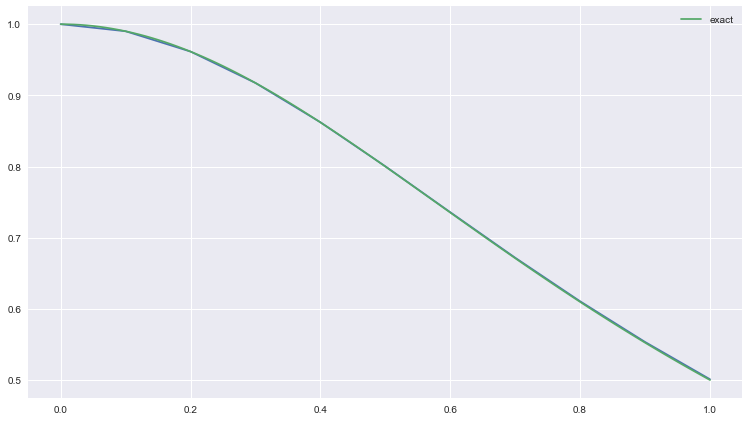

In [274]:
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = [12.8, 7.2]

def f(y, t):
    return -2 * t * y**2

def g(x):
    return 1 / (x**2 + 1)

y0 = 1
t0 = 0
tN = 1
N = 10


plt.plot(*adams_moulton(f,y0,t0,tN,N))

x = np.linspace(0, 1, 101)
plt.plot(x, g(x), label="exact")
plt.legend()
plt.show()

### Predictor-Corrector

In [112]:
def heun(f, y0, t0, tN, N):
    '''
    Returns list of function values approximated with the Heun method.

    f .... function of ODE y' = f(y, t)
    y0 ... initial value y(t0) = y0
    t0 ... start of interval
    tN ... end of interval
    N .... number of steps
    '''
    
    h = (tN - t0) / N
    t = t0 + h * np.arange(N+1)
    
    y = yp = np.zeros(N+1) if isinstance(y0, (int, float)) else np.zeros((N+1, np.size(y0)))
    y[0] = yp[0] = y0
    
    for n in range(N):
        # predictor: forward euler
        yp[n+1] = y[n] + h * f(y[n], t[n])

        #corrector: trapezoidal rule / crank nicolson
        y[n+1] = y[n] + h/2 * (f(y[n], t[n]) + f(yp[n+1], t[n+1]))
    
    return t, y

In [ ]:
def ABE(f, y0, t0, tN, N, order=4, inits=None):
    for n in range(N):
        # predictor: adams bashforth
        vals = y[:]
        yp[n+1] = adams_bashforth(f, y0, t0, t0+h*(s+1), s+1, order=s+1, inits=vals)[1][-1]
        
        # evaluation
        fp[n+1] = f(yp[n+1], t[n+1])
        
        # corrector: adams moulton
        fvals = fn[n:n+s+1]
        y[n+1] = y[n] + h * np.dot(koeffs[] * fvals) + h * koeffs[] * f(yp[n+1], t[n+1])
        
        #evaluation
        fn[n+1] = f(y[n+1], t[n+1])
        
    return t, y

### Adaptive methods

In [ ]:
def double():
    pass

In [ ]:
def RKF45():
    pass

## Test functions

In [16]:
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = [12.8, 7.2]

def f(y, t):
    return -2 * t * y**2

def g(x):
    return 1 / (x**2 + 1)

y0 = 1
t0 = 0
tN = 1
N = 10

t, y = 
plt.plot(t, y, label=f"")

x = np.linspace(0, 1, 101)
plt.plot(x, g(x), label="exact")
plt.legend()
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = [12.8, 7.2]

def f(y, t):
    predator = 0.1 * y[0] * y[1] - 1 * y[0]
    prey = 4 * y[1] - 1 * y[0] * y[1]
    return np.array([predator, prey])

y0 = np.array([3, 5])
t0 = 0
tN = 10
N = 100

t, y =
plt.plot(t, y.T[0], label="predator")
plt.plot(t, y.T[1], label="prey")

plt.legend()
plt.show()